# **Esguerra, Nashrudin Maverick A.**
# **BSCS-IS-3B**

# **Assessment Task: Netflix Userbase Analysis**

## **Part 1: Data Preprocessing**

In [ ]:
#Import Liblaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split



# Load the Dataset
df = pd.read_csv("Netflix_Userbase.csv")

# Display dataset structure
print(df.head())

# Missing Values
print(df.isnull().sum())

# Handle missing values
# For simplicity, let's drop rows with missing values
df.dropna(inplace=True)

# Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=["Gender", "Device"])

# Feature Selection
# For linear regression, select relevant numerical features
# For logistic regression, include user demographics and subscription details
# Here, let's consider Age, Subscription Type, and Device for both models
selected_features_linear = ["Age"]
selected_features_logistic = ["Age", "Subscription_Type", "Device"]

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0

# **Part 2: Exploratory Data Analysis (EDA)**

          User ID  Monthly Revenue          Age  Gender_Female  Gender_Male  \
count  2500.00000      2500.000000  2500.000000    2500.000000  2500.000000   
mean   1250.50000        12.508400    38.795600       0.502800     0.497200   
std     721.83216         1.686851     7.171778       0.500092     0.500092   
min       1.00000        10.000000    26.000000       0.000000     0.000000   
25%     625.75000        11.000000    32.000000       0.000000     0.000000   
50%    1250.50000        12.000000    39.000000       1.000000     0.000000   
75%    1875.25000        14.000000    45.000000       1.000000     1.000000   
max    2500.00000        15.000000    51.000000       1.000000     1.000000   

       Device_Laptop  Device_Smart TV  Device_Smartphone  Device_Tablet  
count    2500.000000      2500.000000        2500.000000    2500.000000  
mean        0.254400         0.244000           0.248400       0.253200  
std         0.435611         0.429579           0.432171       0.4

<ipython-input-3-c33443bc8f45>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded["Monthly Revenue"], bins=20, kde=True)


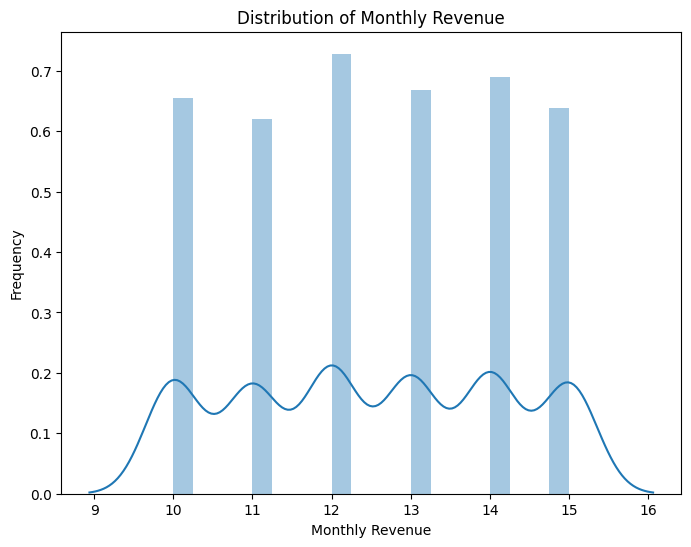

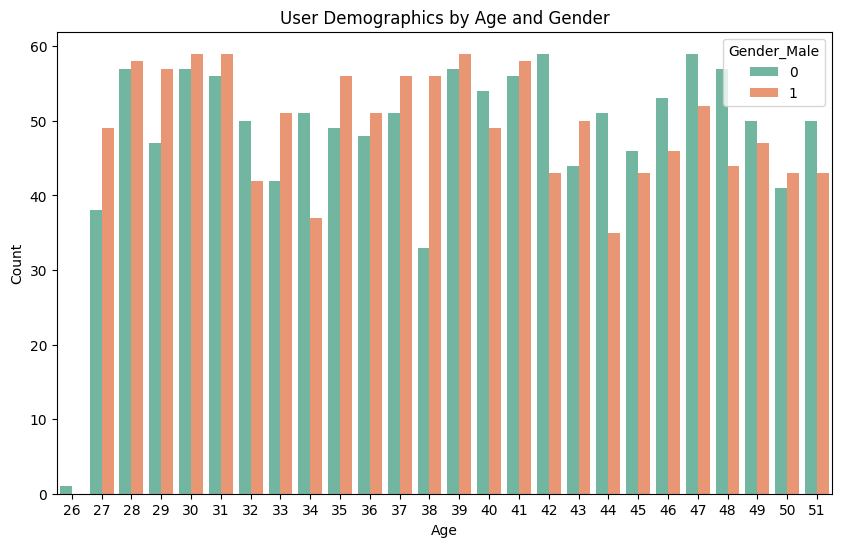

In [ ]:
# Descriptive Statistics
print(df_encoded.describe())


# Descriptive Statistics
print(df_encoded.describe())

# Visualizations

# Distribution of Monthly Revenue
plt.figure(figsize=(8, 6))
sns.distplot(df_encoded["Monthly Revenue"], bins=20, kde=True)
plt.title("Distribution of Monthly Revenue")
plt.xlabel("Monthly Revenue")
plt.ylabel("Frequency")
plt.show()

# User demographics visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x="Age", hue="Gender_Male", palette="Set2")
plt.title("User Demographics by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:

# Split data into train and test sets
X_linear = df_encoded[selected_features_linear]
y_linear = df_encoded["Monthly Revenue"]
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Build the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

# Model Evaluation
y_pred_linear = linear_model.predict(X_test_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)
rmse_linear = mean_squared_error(y_test_linear, y_pred_linear, squared=False)

print("Linear Regression Model Evaluation:")
print(f"R-squared: {r2_linear}")
print(f"RMSE: {rmse_linear}")


Linear Regression Model Evaluation:
R-squared: -0.006933994071707472
RMSE: 1.667725628911762


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:

# Encode target variable
le = LabelEncoder()
df_encoded["Monthly Revenue"] = le.fit_transform(df_encoded["Monthly Revenue"])

# Split data into train and test sets
X_logistic = df_encoded[selected_features_linear]
y_logistic = df_encoded["Monthly Revenue"]
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Build the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Model Evaluation
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic, average='weighted')  # Specify 'average' parameter
recall = recall_score(y_test_logistic, y_pred_logistic, average='weighted')  # Specify 'average' parameter
f1 = f1_score(y_test_logistic, y_pred_logistic, average='weighted')  # Specify 'average' parameter
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)




Logistic Regression Model Evaluation:
Accuracy: 0.19
Precision: 0.09554884924312636
Recall: 0.19
F1-score: 0.11761118917210754
Confusion Matrix:
[[ 0  0 56 24  5  0]
 [ 0  0 41 30  8  0]
 [ 0  0 55 28 10  0]
 [ 0  0 44 33 11  0]
 [ 0  0 54 24  7  0]
 [ 0  0 36 27  7  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Part 5: Comparative Analysis and Visualization**

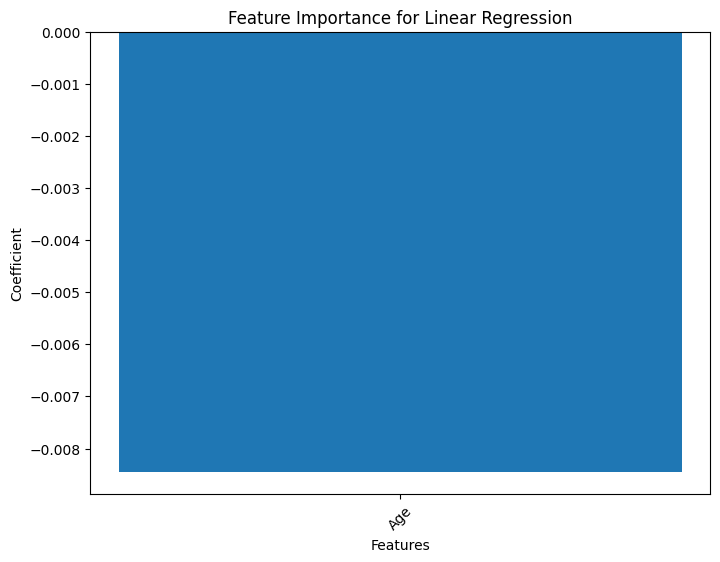

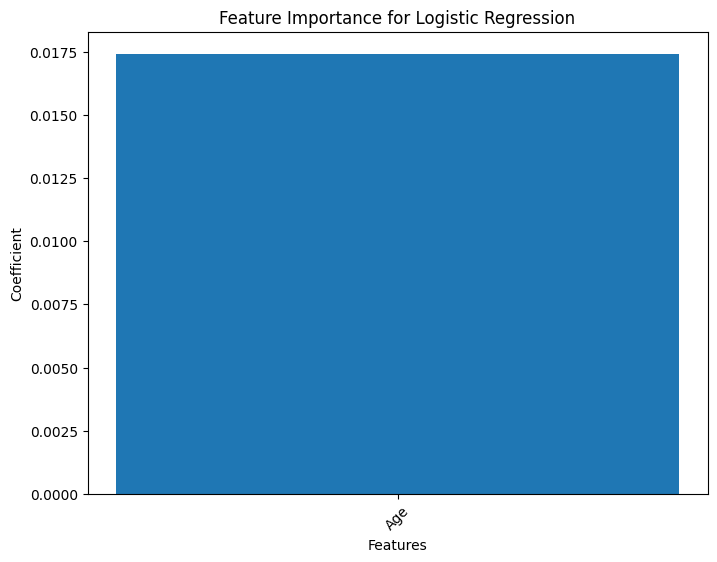

In [ ]:




# Feature Importance for linear regression
linear_regression_coefficients = linear_model.coef_[0]
plt.figure(figsize=(8, 6))
plt.bar(X_linear.columns, linear_regression_coefficients)
plt.title("Feature Importance for Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()

# Feature Importance for logistic regression
logistic_regression_coefficients = logistic_model.coef_[0]
plt.figure(figsize=(8, 6))
plt.bar(X_logistic.columns, logistic_regression_coefficients)
plt.title("Feature Importance for Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()



# Insights
# Interpretation and insights can be drawn based on the coefficients of the regression models and their impact on Monthly Revenue and feedback.